In [504]:
# import des differents modules
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import missingno as msno 
import streamlit as st

In [505]:
# Lecture de notre CSV
df = pd.read_csv('immo.csv')
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [506]:
# Info sur le nb de lignes et de colonnes
df.shape

(21613, 21)

In [507]:
# Informations sur les premières lignes ainsi que les colonnes

df.head()

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [508]:
# Description de notre notre CSV
df.describe()

,id,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

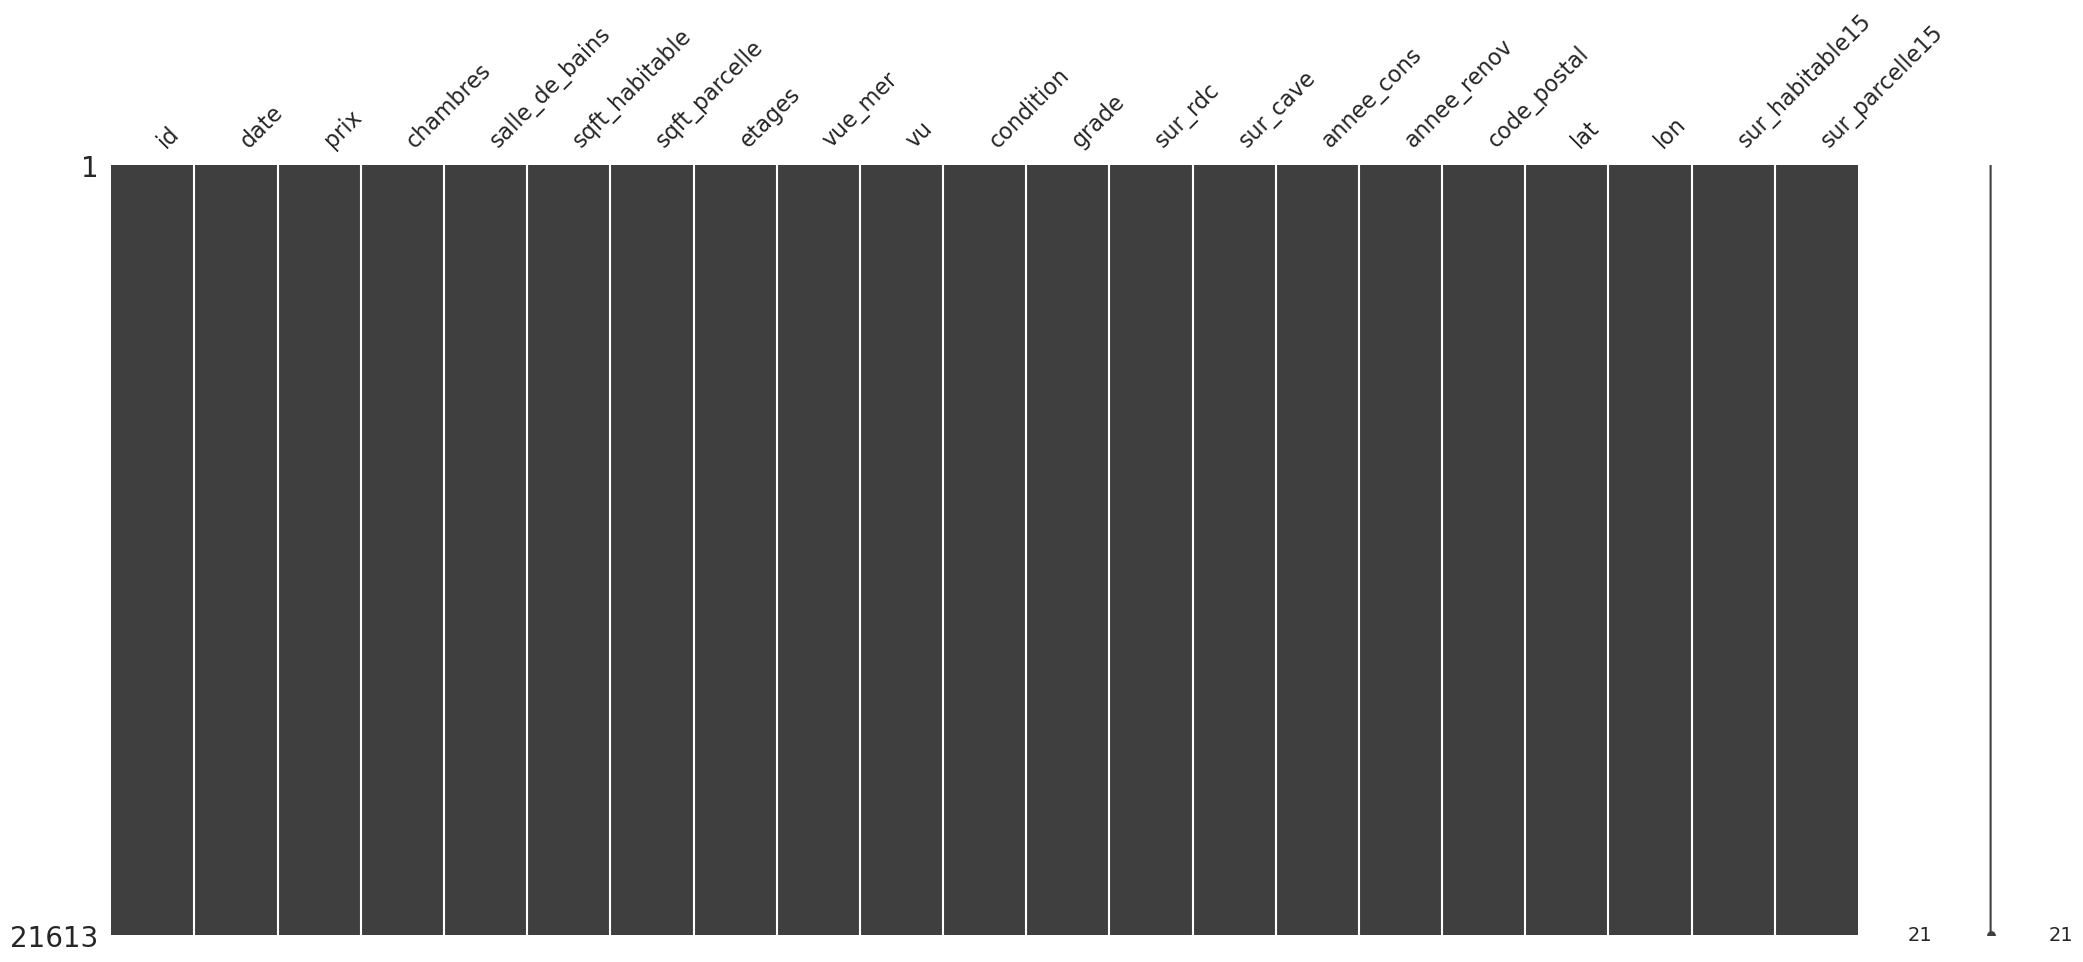

In [509]:
# Vérification si des données sont manquantes
msno.matrix(df)

In [510]:
# Filtration des lignes
df.iloc[:,:]

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [511]:
# Vérification des valeurs de la colonnes avec le nombres de maisons correspondantes
df['salle_de_bains'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: salle_de_bains, dtype: int64

In [512]:
# regroupement par groupe, chambres et id avec la moyenne
df.groupby(['chambres','id']).mean()

prix  salle_de_bains  sqft_habitable  sqft_parcelle  \
chambres id                                                                     
0        1222029077   265000.0            0.75           384.0       213444.0   
         1453602309   288000.0            1.50          1430.0         1650.0   
         2310060040   240000.0            2.50          1810.0         5669.0   
         2569500210   339950.0            2.50          2290.0         8319.0   
         2954400190  1295650.0            0.00          4810.0        28008.0   
...                        ...             ...             ...            ...   
10       627300145   1148000.0            5.25          4590.0        10920.0   
         5566100170   650000.0            2.00          3610.0        11914.0   
         8812401450   660000.0            3.00          2920.0         3745.0   
11       1773100755   520000.0            3.00          3000.0         4960.0   
33       2402100895   640000.0            1.75          1620.0         6000.0   

                     etages  vue_mer   vu  condition  grade  sur_rdc  \
chambres id                                                            
0        1222029077     1.0      0.0  0.0        3.0    4.0    384.0   
         1453602309     3.0      0.0  0.0        3.0    7.0   1430.0   
         2310060040     2.0      0.0  0.0        3.0    7.0   1810.0   
         2569500210     2.0      0.0  0.0        3.0    8.0   2290.0   
         2954400190     2.0      0.0  0.0        3.0   12.0   4810.0   
...                     ...      ...  ...        ...    ...      ...   
10       627300145      1.0      0.0  2.0        3.0    9.0   2500.0   
         5566100170     2.0      0.0  0.0        4.0    7.0   3010.0   
         8812401450     2.0      0.0  0.0        4.0    7.0   1860.0   
11       1773100755     2.0      0.0  0.0        3.0    7.0   2400.0   
33       2402100895     1.0      0.0  0.0        5.0    7.0   1040.0   

                     sur_cave  annee_cons  annee_renov  code_postal      lat  \
chambres id                                                                    
0        1222029077       0.0      2003.0          0.0      98070.0  47.4177   
         1453602309       0.0      1999.0          0.0      98125.0  47.7222   
         2310060040       0.0      2003.0          0.0      98038.0  47.3493   
         2569500210       0.0      1985.0          0.0      98042.0  47.3473   
         2954400190       0.0      1990.0          0.0      98053.0  47.6642   
...                       ...         ...          ...          ...      ...   
10       627300145     2090.0      2008.0          0.0      98004.0  47.5861   
         5566100170     600.0      1958.0          0.0      98006.0  47.5705   
         8812401450    1060.0      1913.0          0.0      98105.0  47.6635   
11       1773100755     600.0      1918.0       1999.0      98106.0  47.5560   
33       2402100895     580.0      1947.0          0.0      98103.0  47.6878   

                         lon  sur_habitable15  sur_parcelle15  
chambres id                                                    
0        1222029077 -122.491           1920.0        224341.0  
         1453602309 -122.290           1430.0          1650.0  
         2310060040 -122.053           1810.0          5685.0  
         2569500210 -122.151           2500.0          8751.0  
         2954400190 -122.069           4740.0         35061.0  
...                      ...              ...             ...  
10       627300145  -122.113           2730.0         10400.0  
         5566100170 -122.175           2040.0         11914.0  
         8812401450 -122.320           1810.0          3745.0  
11       1773100755 -122.363           1420.0          4960.0  
33       2402100895 -122.331           1330.0          4700.0  

[21436 rows x 18 columns]

In [513]:
# On filtre les maisons qui ont plus de 10 chambres
df.loc[df['chambres'] > 10]

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [514]:
# conversion des PIEDCARRE en M2 et ajout des nouvelles colonnes

df = df.assign(surface = df.sqft_habitable * 0.092903)
df = df.assign(m2_parcelle = df.sqft_parcelle * 0.092903)
df = df.assign(m2_cave = df.sur_cave * 0.092903)
df = df.assign(rdc = df.sur_rdc * 0.092903)
df = df.assign(surface_habit15 = df.sur_habitable15 * 0.092903)
df = df.assign(surface_parc15 = df.sur_parcelle15 * 0.092903)

In [515]:
# verification de la conversion précédement effectuées

df['sqft_habitable']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_habitable, Length: 21613, dtype: int64

In [516]:
# vérification des données de notre conversion avec les prix
df.groupby(['sqft_habitable','prix']).all()

,,id,date,chambres,salle_de_bains,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15,surface,m2_parcelle,m2_cave,rdc,surface_habit15,surface_parc15
sqft_habitable,prix,,,,,,,,,,,,,,,,,,,,,,,,,
290,142000.0,True,True,False,False,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True
370,276000.0,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True
380,245000.0,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True
384,265000.0,True,True,False,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True
390,228000.0,True,True,False,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9640,4668000.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9890,6885000.0,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
10040,7062500.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [517]:
# Filtration des maison ayant plus de 700 m2
df.loc[df['surface'] > 700]

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15,surface,m2_parcelle,m2_cave,rdc,surface_habit15,surface_parc15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,744.15303,4228.665851,187.66406,556.48897,318.65729,2488.685564
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,743.22400,2228.278455,118.91584,624.30816,427.35380,2020.640250
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,932.74612,3467.604475,219.25108,713.49504,365.10879,2364.288447
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,854.70760,3258.015307,278.70900,575.99860,330.73468,2261.723535
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1119.48115,2564.122800,323.30244,796.17871,366.03782,817.546400
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,895.58492,1214.056404,447.79246,447.79246,303.79281,971.207962
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,918.81067,2914.738722,95.69009,823.12058,421.77962,3969.745190
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,1257.90662,28591.084056,383.68939,874.21723,450.57955,20234.273400
13411,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,732.07564,2252.897750,0.00000,732.07564,254.55422,999.729183
14032,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140,2840,20809,707.92086,2743.983008,152.36092,555.55994,263.84452,1933.218527


In [518]:
# suppression des maisons ayant 1 chambre
df.drop(df[df['chambres'] < 1].index, inplace= True)

In [519]:
df.shape

(21600, 27)

In [520]:
df.head()

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15,surface,m2_parcelle,m2_cave,rdc,surface_habit15,surface_parc15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554,524.901950,0.00000,109.62554,124.49002,524.901950
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.76071,672.803526,37.16120,201.59951,157.00607,709.686017
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531,929.030000,0.00000,71.53531,252.69616,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988,464.515000,84.54173,97.54815,126.34808,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704,750.656240,0.00000,156.07704,167.22540,697.051209


<AxesSubplot:>

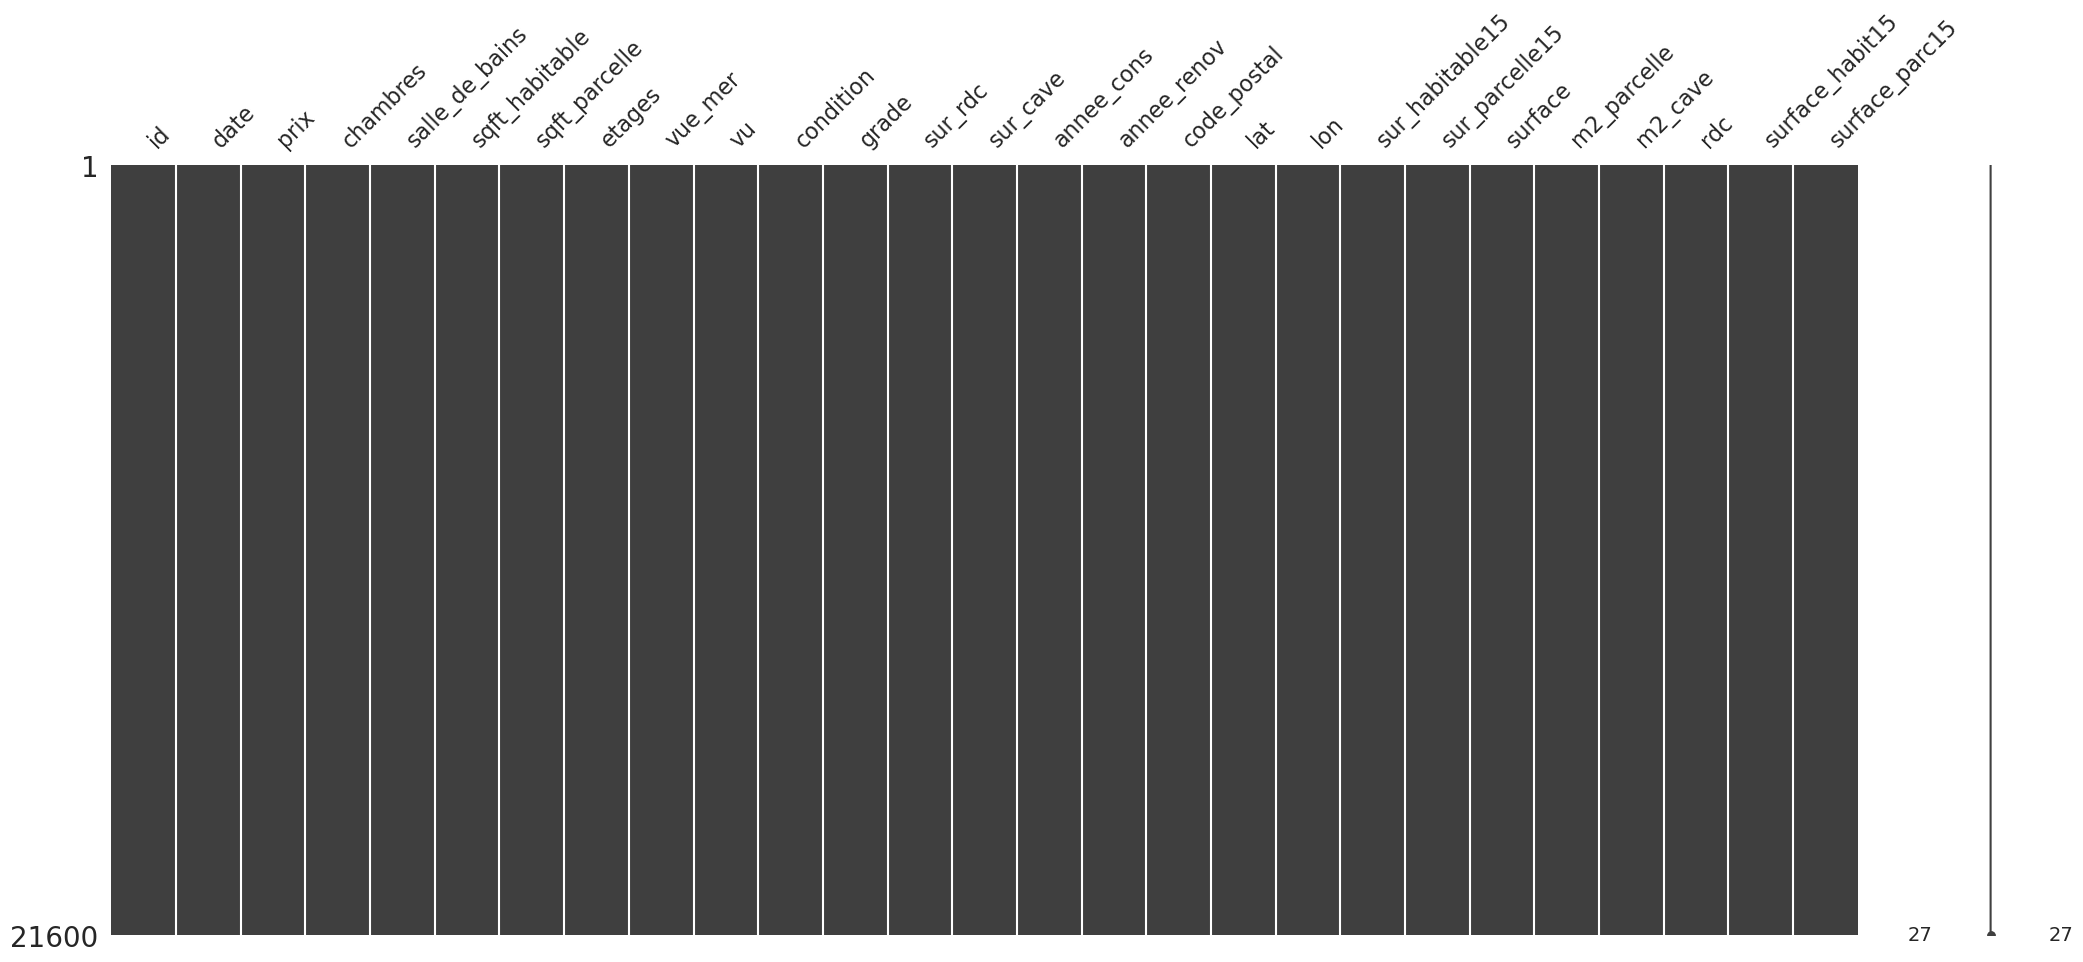

In [521]:
msno.matrix(df)

In [522]:
# filtres des maisons ayant une date de rénovation d'avant 1980
df.loc[df['annee_renov'] <1980]

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15,surface,m2_parcelle,m2_cave,rdc,surface_habit15,surface_parc15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554,524.901950,0.00000,109.62554,124.49002,524.901950
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531,929.030000,0.00000,71.53531,252.69616,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988,464.515000,84.54173,97.54815,126.34808,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704,750.656240,0.00000,156.07704,167.22540,697.051209
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,503.53426,9469.602790,142.14159,361.39267,442.21828,9469.602790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,142.14159,105.073293,0.00000,142.14159,142.14159,140.190627
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,214.60593,540.045139,0.00000,214.60593,170.01249,668.901600
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,94.76106,125.419050,0.00000,94.76106,94.76106,186.456321
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,148.64480,221.852364,0.00000,148.64480,130.99323,119.566161


In [523]:
# Code postal par ordre croissant
df.groupby(['code_postal']).min()

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,etages,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,lat,lon,sur_habitable15,sur_parcelle15,surface,m2_parcelle,m2_cave,rdc,surface_habit15,surface_parc15
code_postal,,,,,,,,,,,,,,,,,,,,,,,,,,
98001,128500260,20140502T000000,100000.0,1,0.75,770,2064,1.0,0,0,2,5,770,0,1903,0,47.2576,-122.294,828,2855,71.53531,191.751792,0.0,71.53531,76.923684,265.238065
98002,1000102,20140514T000000,95000.0,1,0.75,690,2800,1.0,0,0,3,5,690,0,1908,0,47.2761,-122.229,860,2800,64.10307,260.128400,0.0,64.10307,79.896580,260.128400
98003,100500020,20140502T000000,128000.0,1,1.00,760,1302,1.0,0,0,2,6,760,0,1927,0,47.2574,-122.334,970,1302,70.60628,120.959706,0.0,70.60628,90.115910,120.959706
98004,249000115,20140505T000000,425000.0,2,1.00,860,779,1.0,0,0,1,6,820,0,1908,0,47.5806,-122.229,1290,794,79.89658,72.371437,0.0,76.18046,119.844870,73.764982
98005,324059112,20140505T000000,400000.0,2,1.00,980,2551,1.0,0,0,2,6,920,0,1943,0,47.5830,-122.185,1440,2601,91.04494,236.995553,0.0,85.47076,133.780320,241.640703
98006,97600140,20140502T000000,247500.0,2,0.75,930,1960,1.0,0,0,1,6,680,0,1911,0,47.5380,-122.197,1060,2511,86.39979,182.089880,0.0,63.17404,98.477180,233.279433
98007,11200070,20140502T000000,295000.0,2,1.00,970,1962,1.0,0,0,3,7,880,0,1954,0,47.5647,-122.153,1250,2055,90.11591,182.275686,0.0,81.75464,116.128750,190.915665
98008,224059021,20140502T000000,250000.0,2,1.00,940,1055,1.0,0,0,3,6,660,0,1942,0,47.5692,-122.132,990,1340,87.32882,98.012665,0.0,61.31598,91.973970,124.490020
98010,321079066,20140507T000000,135000.0,1,0.75,520,4814,1.0,0,0,3,4,520,0,1900,0,47.2931,-122.053,820,6160,48.30956,447.235042,0.0,48.30956,76.180460,572.282480


In [524]:
# Etage par ordre croissant
df.groupby(['etages']).min()

,id,date,prix,chambres,salle_de_bains,sqft_habitable,sqft_parcelle,vue_mer,vu,condition,grade,sur_rdc,sur_cave,annee_cons,annee_renov,code_postal,lat,lon,sur_habitable15,sur_parcelle15,surface,m2_parcelle,m2_cave,rdc,surface_habit15,surface_parc15
etages,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1200019,20140502T000000,75000.0,1,0.00,370,833,0,0,1,3,370,0,1900,0,98001,47.1647,-122.515,460,980,34.37411,77.388199,0.0,34.37411,42.735380,91.044940
1.5,2800031,20140502T000000,92000.0,1,0.75,490,520,0,0,1,4,490,0,1900,0,98001,47.1622,-122.507,800,660,45.52247,48.309560,0.0,45.52247,74.322400,61.315980
2.0,1000102,20140502T000000,90000.0,1,0.50,550,572,0,0,1,5,550,0,1900,0,98001,47.1559,-122.519,399,651,51.09665,53.140516,0.0,51.09665,37.068297,60.479853
2.5,120069059,20140502T000000,255000.0,1,1.00,990,736,0,0,3,6,880,0,1900,0,98001,47.1960,-122.408,1030,1068,91.97397,68.376608,0.0,81.75464,95.690090,99.220404
3.0,108000127,20140502T000000,205000.0,1,1.00,760,609,0,0,3,7,760,0,1909,0,98004,47.3689,-122.412,820,659,70.60628,56.577927,0.0,70.60628,76.180460,61.223077
3.5,1346300150,20140625T000000,435000.0,2,2.50,1310,1037,0,0,3,8,1310,0,1904,0,98103,47.5594,-122.392,1280,1026,121.70293,96.340411,0.0,121.70293,118.915840,95.318478


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'prix'}>,
        <AxesSubplot:title={'center':'chambres'}>,
        <AxesSubplot:title={'center':'salle_de_bains'}>,
        <AxesSubplot:title={'center':'sqft_habitable'}>],
       [<AxesSubplot:title={'center':'sqft_parcelle'}>,
        <AxesSubplot:title={'center':'etages'}>,
        <AxesSubplot:title={'center':'vue_mer'}>,
        <AxesSubplot:title={'center':'vu'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sur_rdc'}>,
        <AxesSubplot:title={'center':'sur_cave'}>,
        <AxesSubplot:title={'center':'annee_cons'}>,
        <AxesSubplot:title={'center':'annee_renov'}>],
       [<AxesSubplot:title={'center':'code_postal'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'sur_habitable15'}>,
        <AxesSubplot:title={

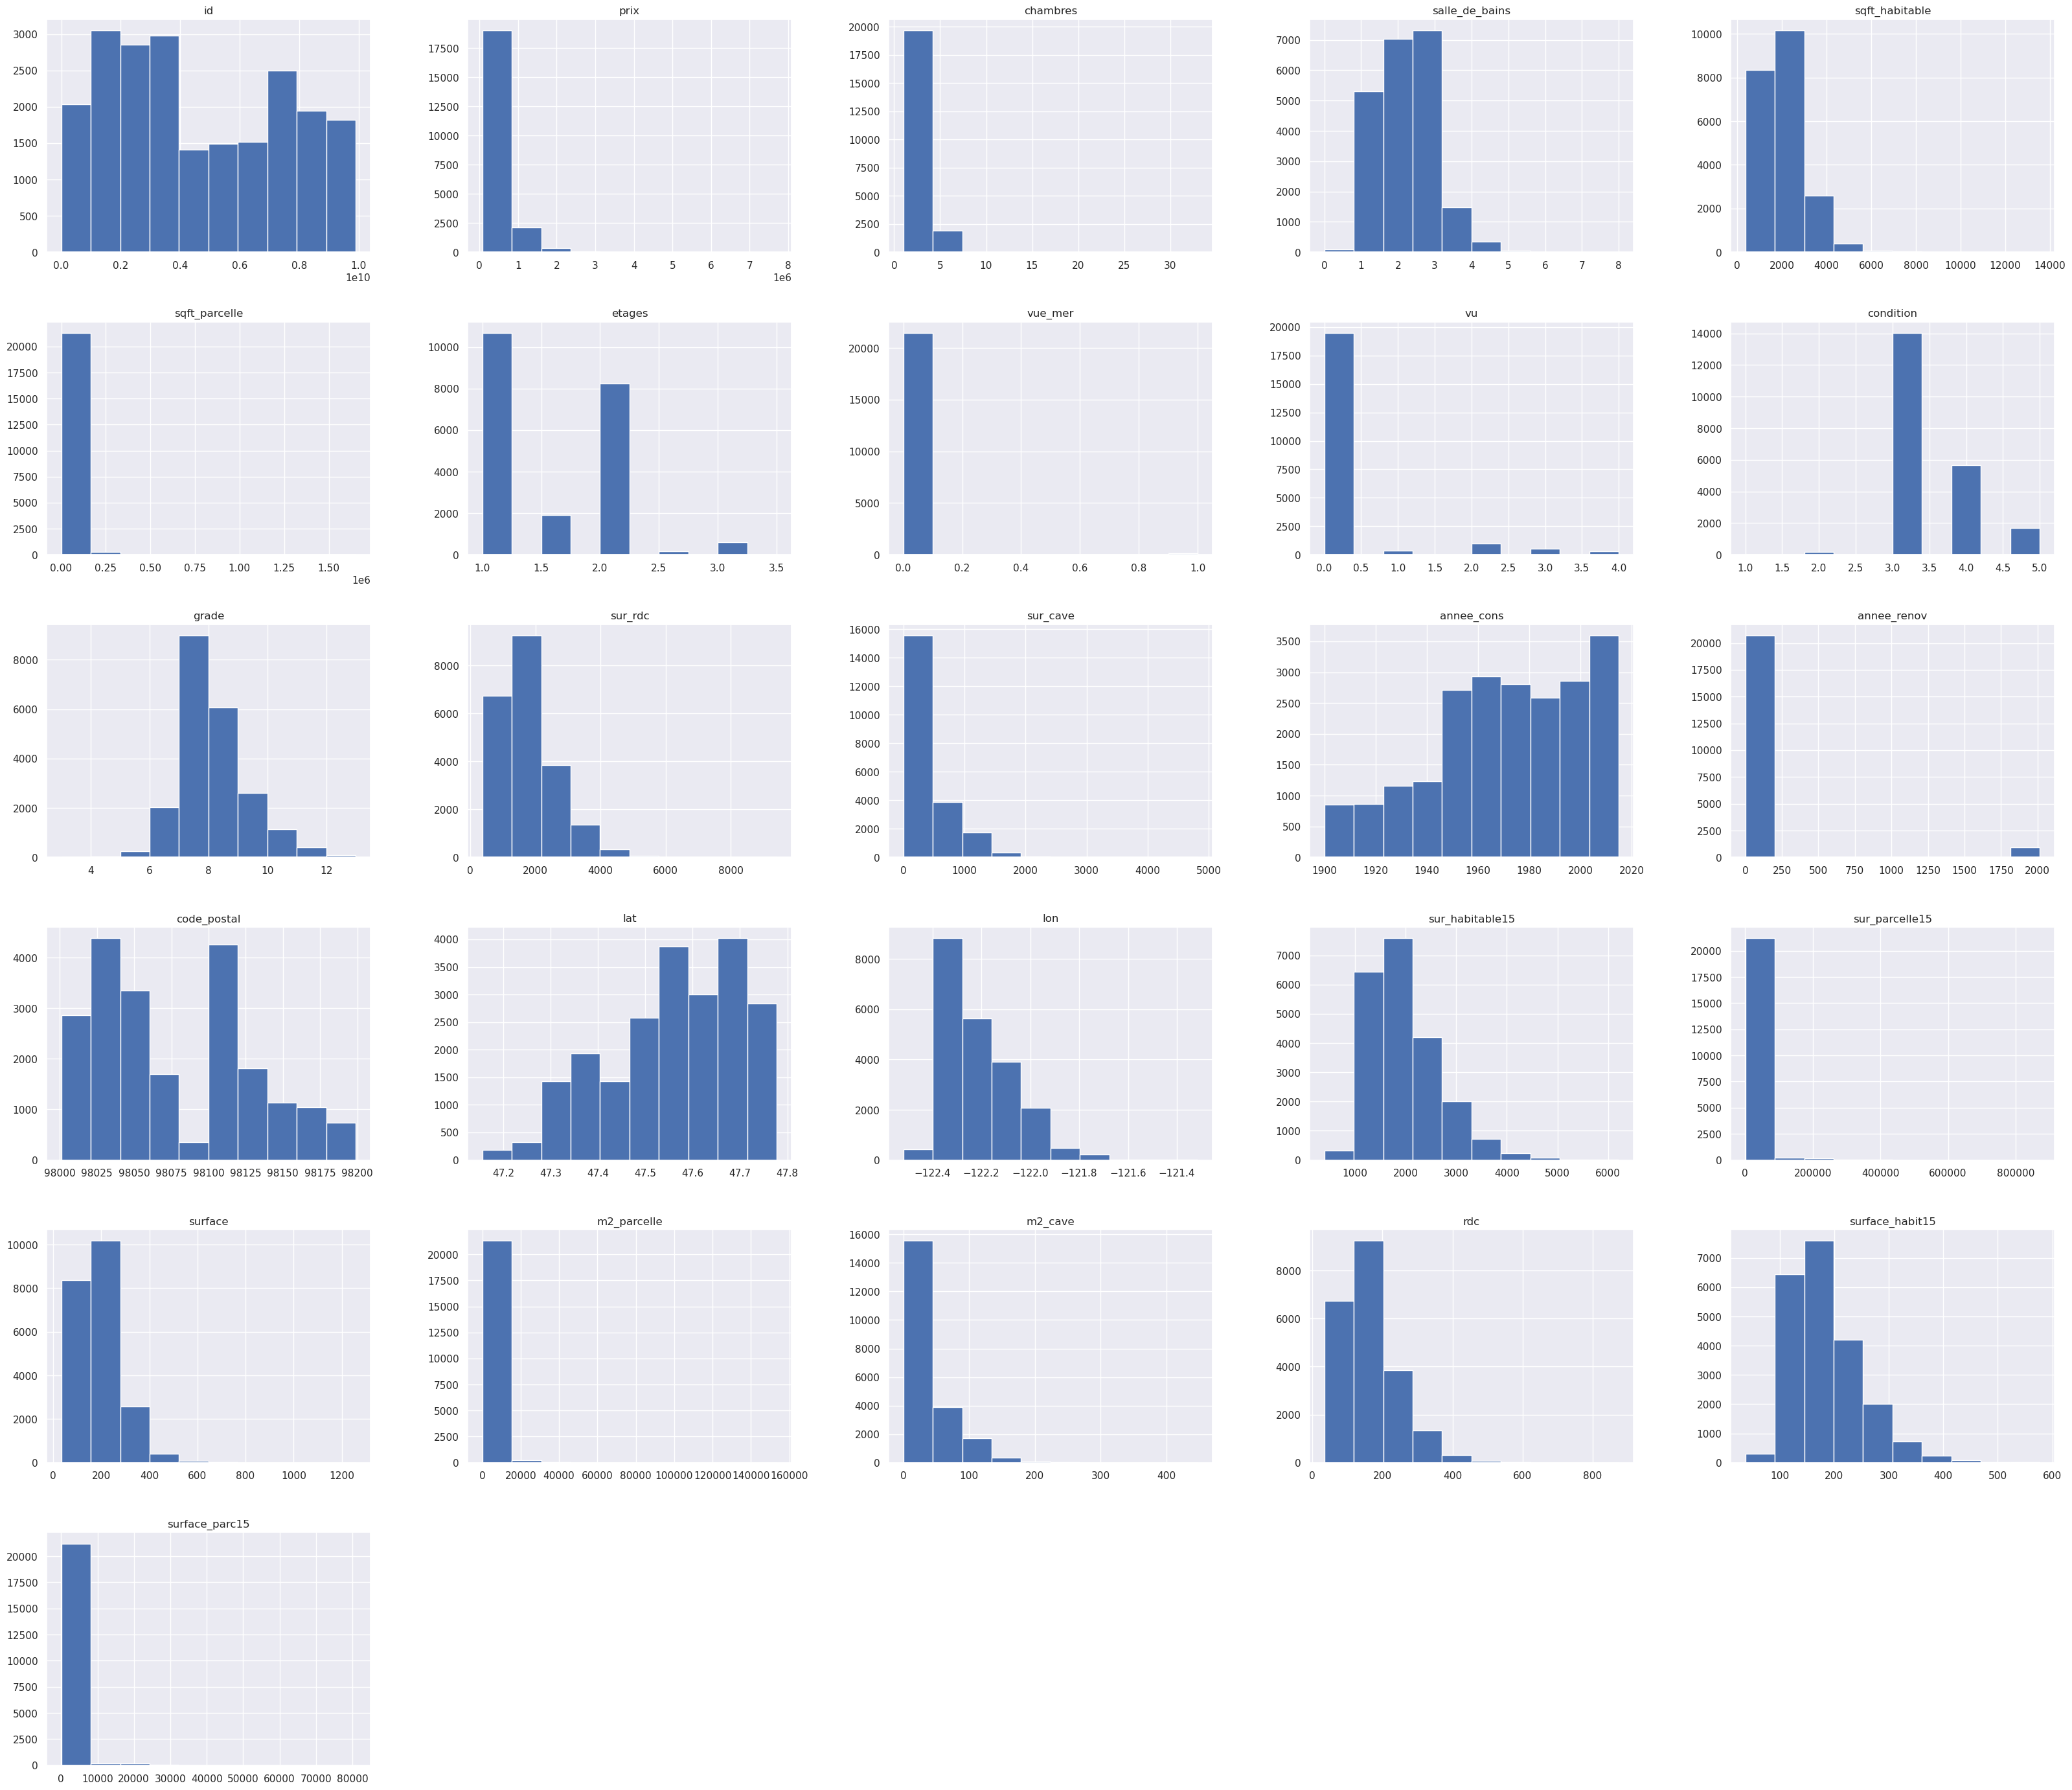

In [525]:
# Ouhya le tableau, qu'il est beau mon tableau
df.hist(figsize=[40, 35])

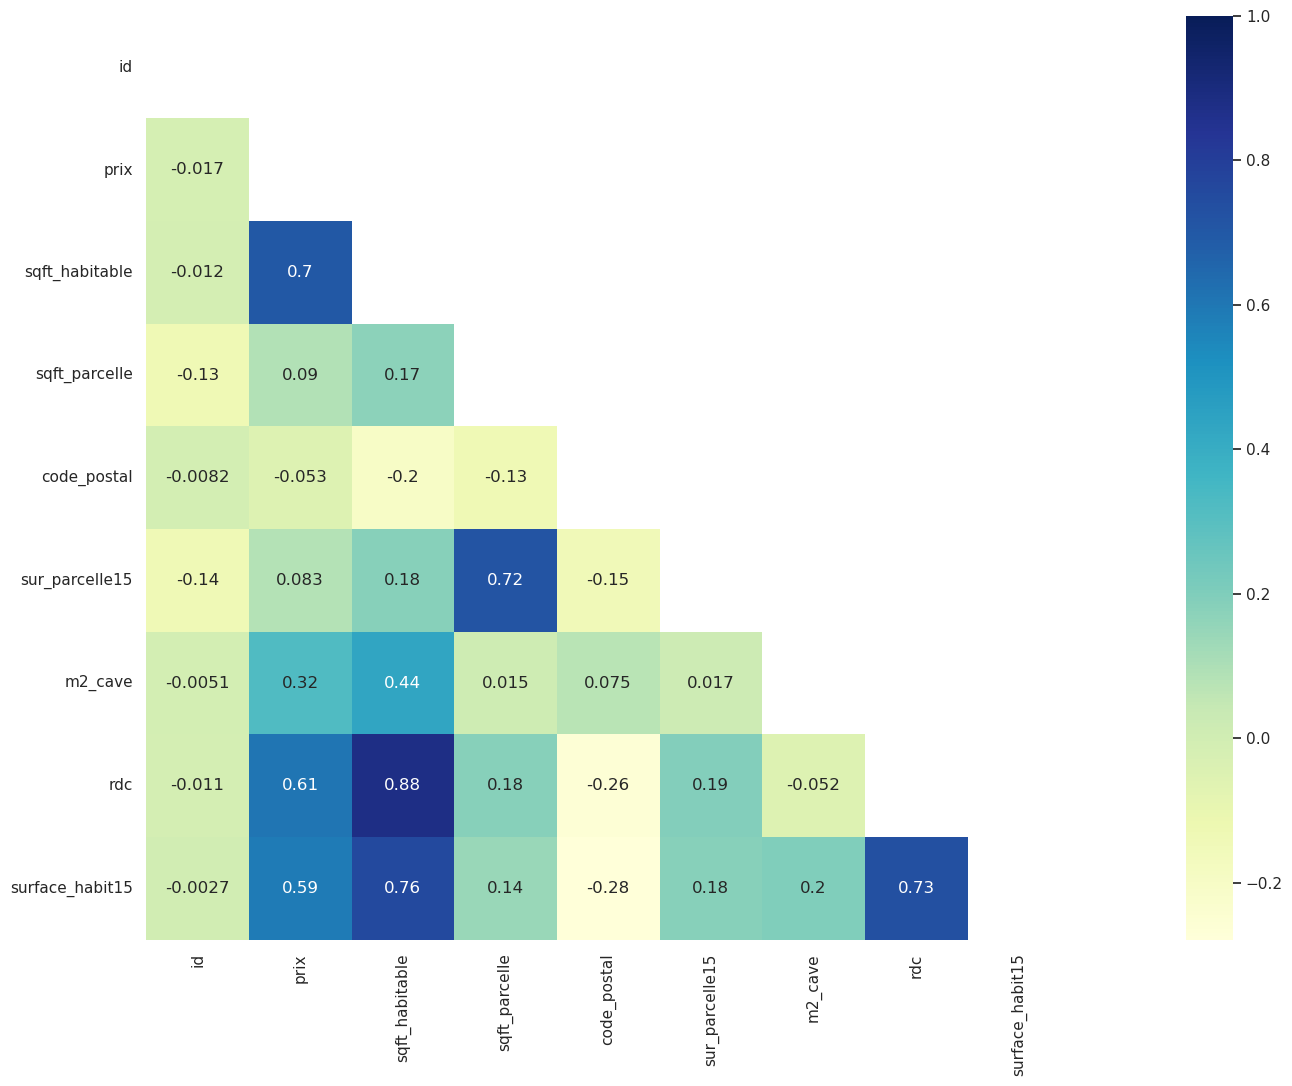

In [526]:
# Nouveau tableau trop bien avec les couleurs car il est pimpé (de l'émision Pimp my board)

pearson = df.corr(method='pearson')
pearson = df.drop(['etages','vue_mer','condition','lat','lon', 'sur_cave','vu','sur_rdc','chambres','salle_de_bains','m2_parcelle','surface','etages','sur_habitable15','surface_parc15','annee_cons','annee_renov','grade'],axis=1)
pearson = pearson.corr(method='pearson')
sns.set(rc={'figure.figsize':(30,12)})
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   ax = sns.heatmap(data=pearson, cmap="YlGnBu", mask=mask, vmax=1, annot=True, square=True)

In [527]:
# convertie les codes postaux en colonnes
df = df.join(pd.get_dummies(df['code_postal']))

<AxesSubplot:xlabel='surface', ylabel='prix'>

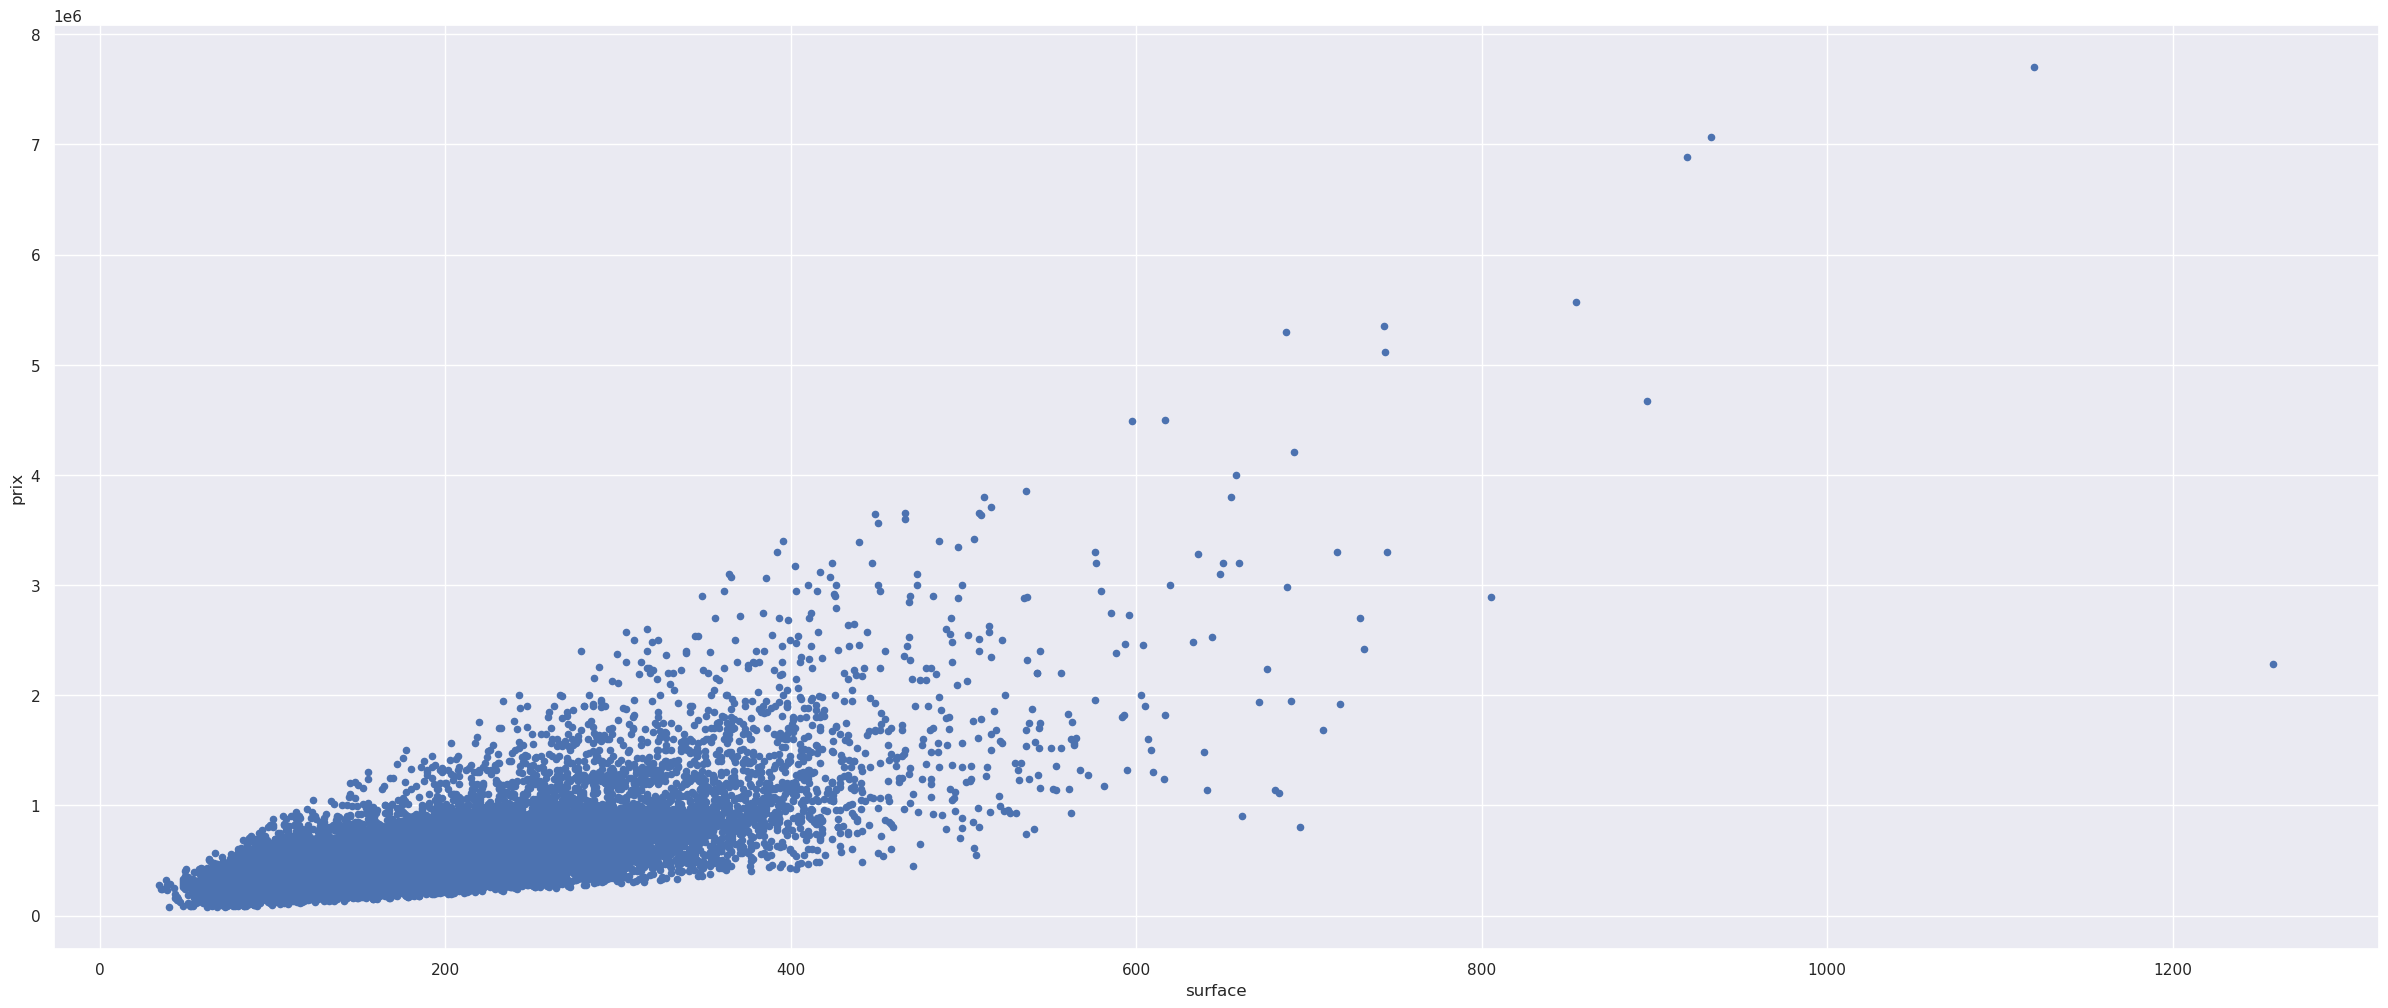

In [528]:
# graphique en nuage de points pas vraiment comprehensible
df.plot.scatter(x="surface",y="prix") 

<AxesSubplot:xlabel='chambres', ylabel='prix'>

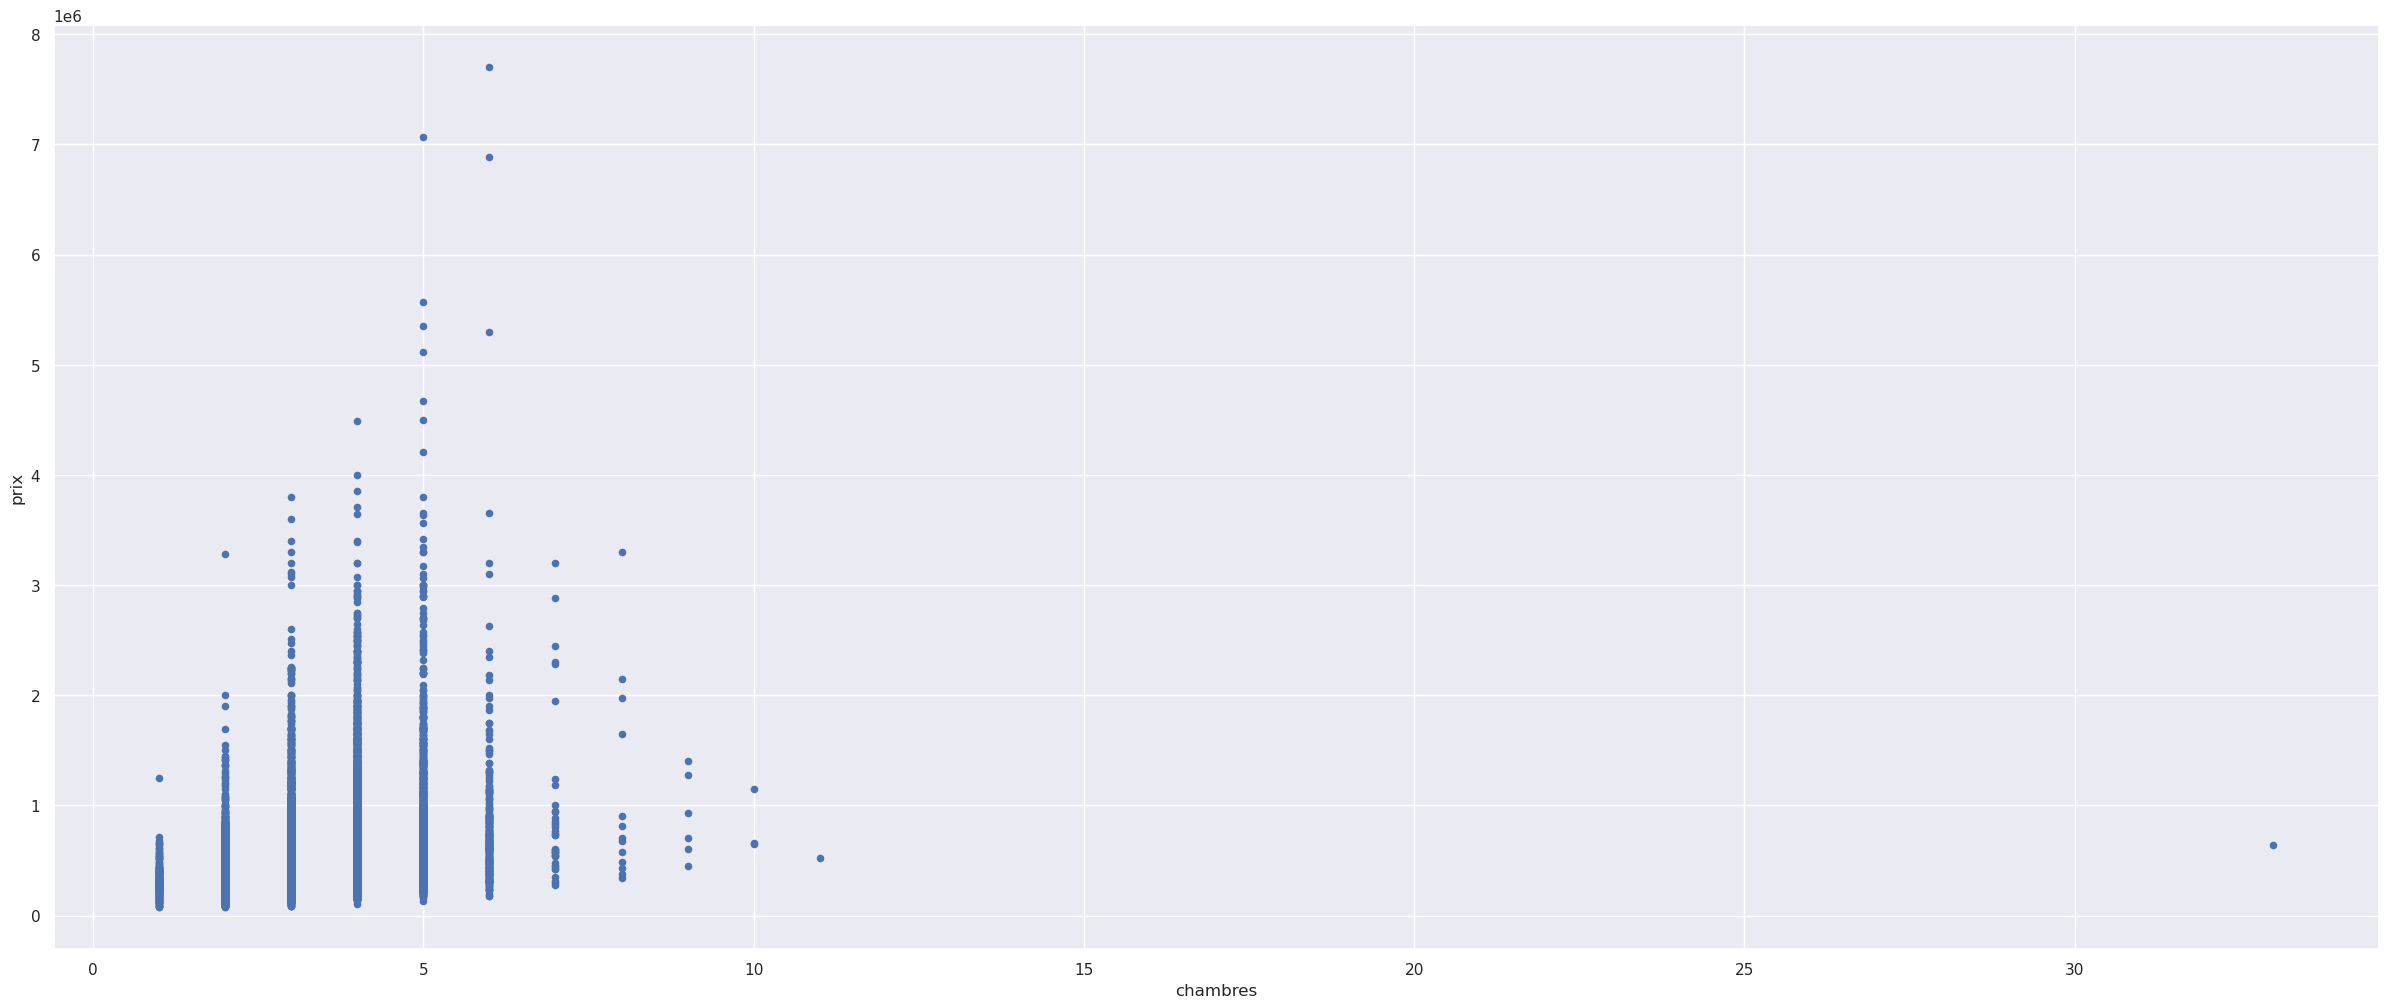

In [529]:
df.plot.scatter(x="chambres",y="prix") 

<AxesSubplot:xlabel='salle_de_bains', ylabel='prix'>

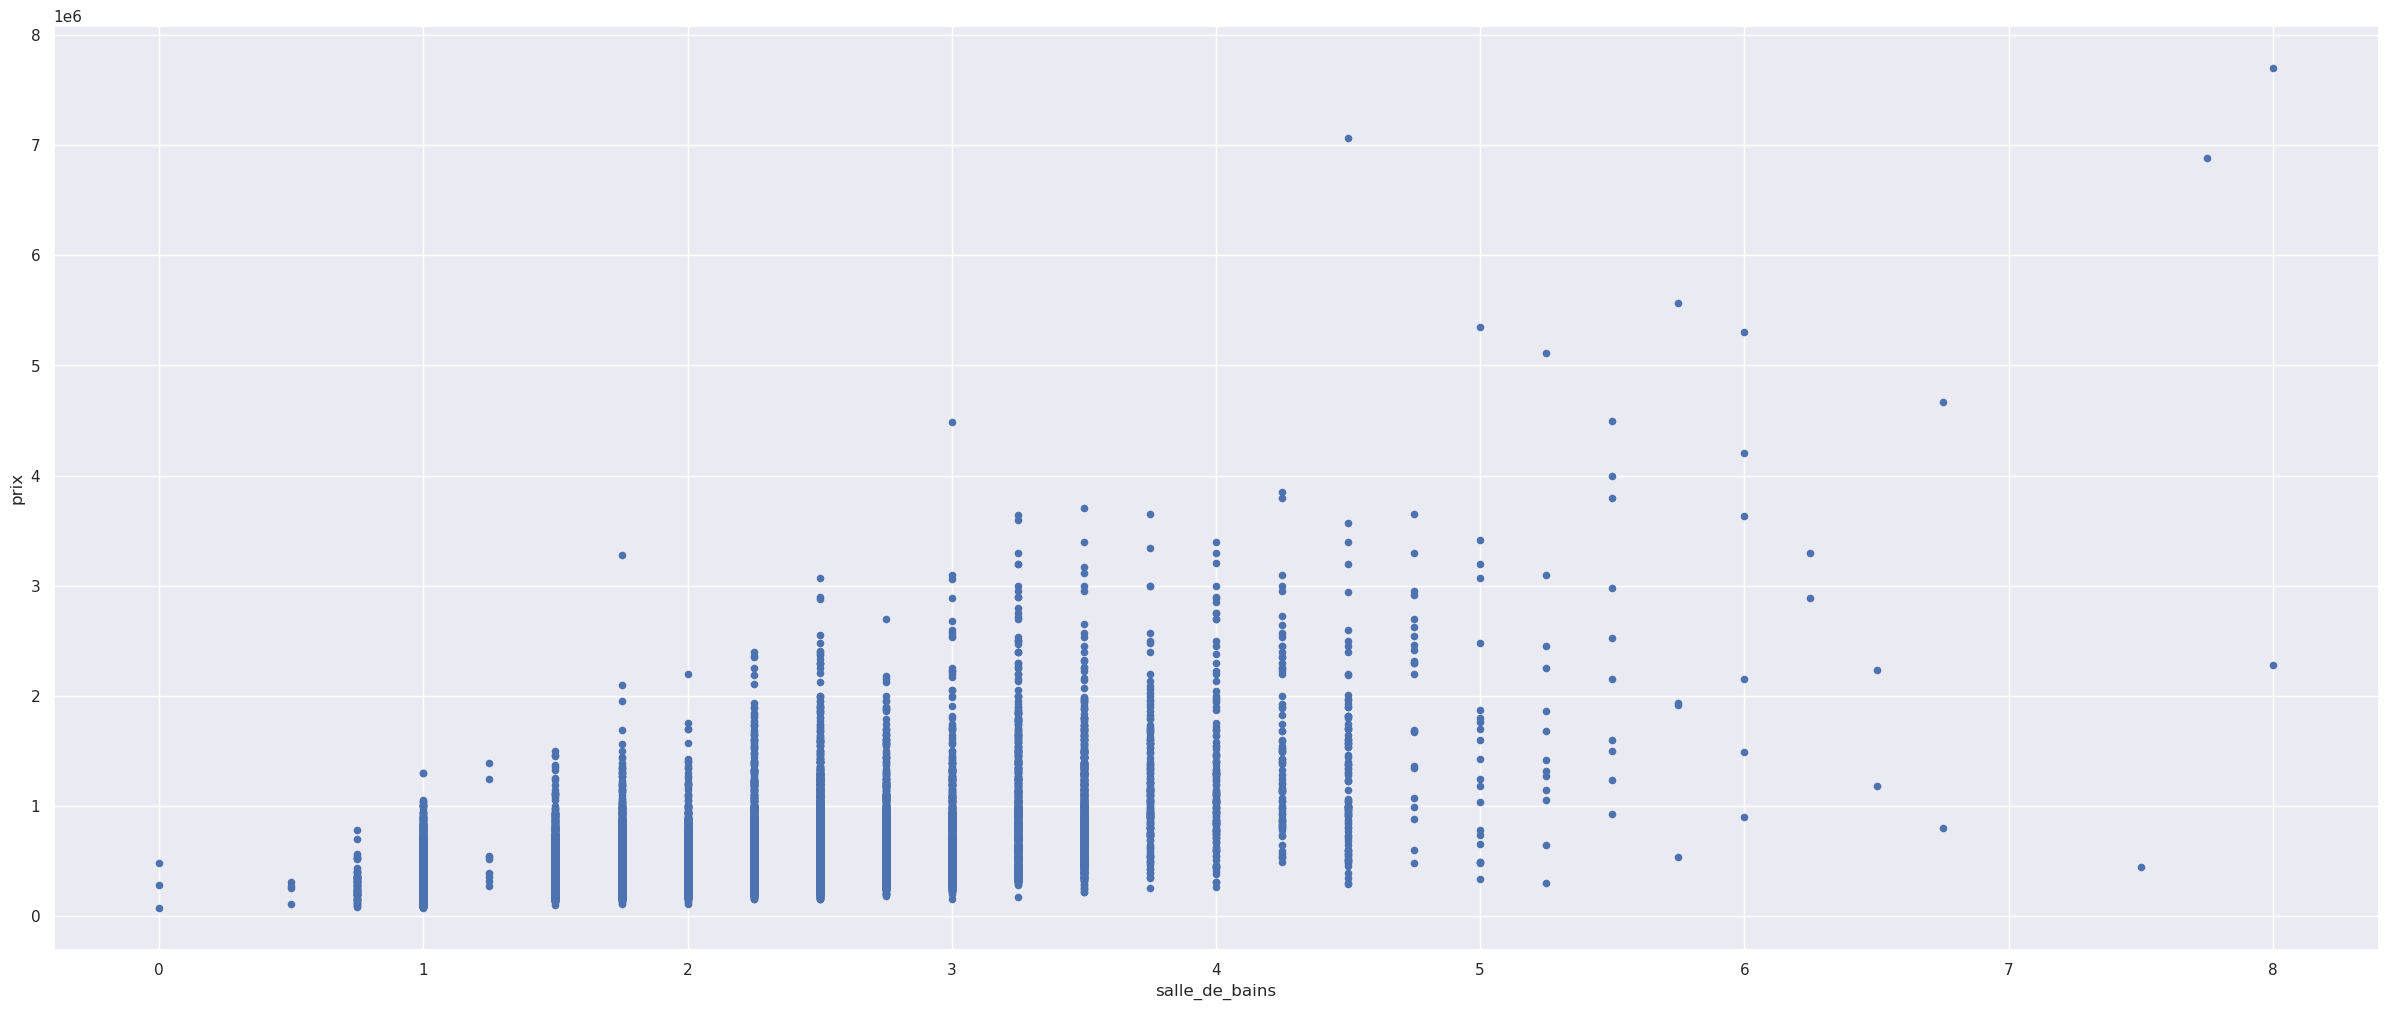

In [530]:
df.plot.scatter(x="salle_de_bains",y="prix") 

<AxesSubplot:xlabel='chambres', ylabel='salle_de_bains'>

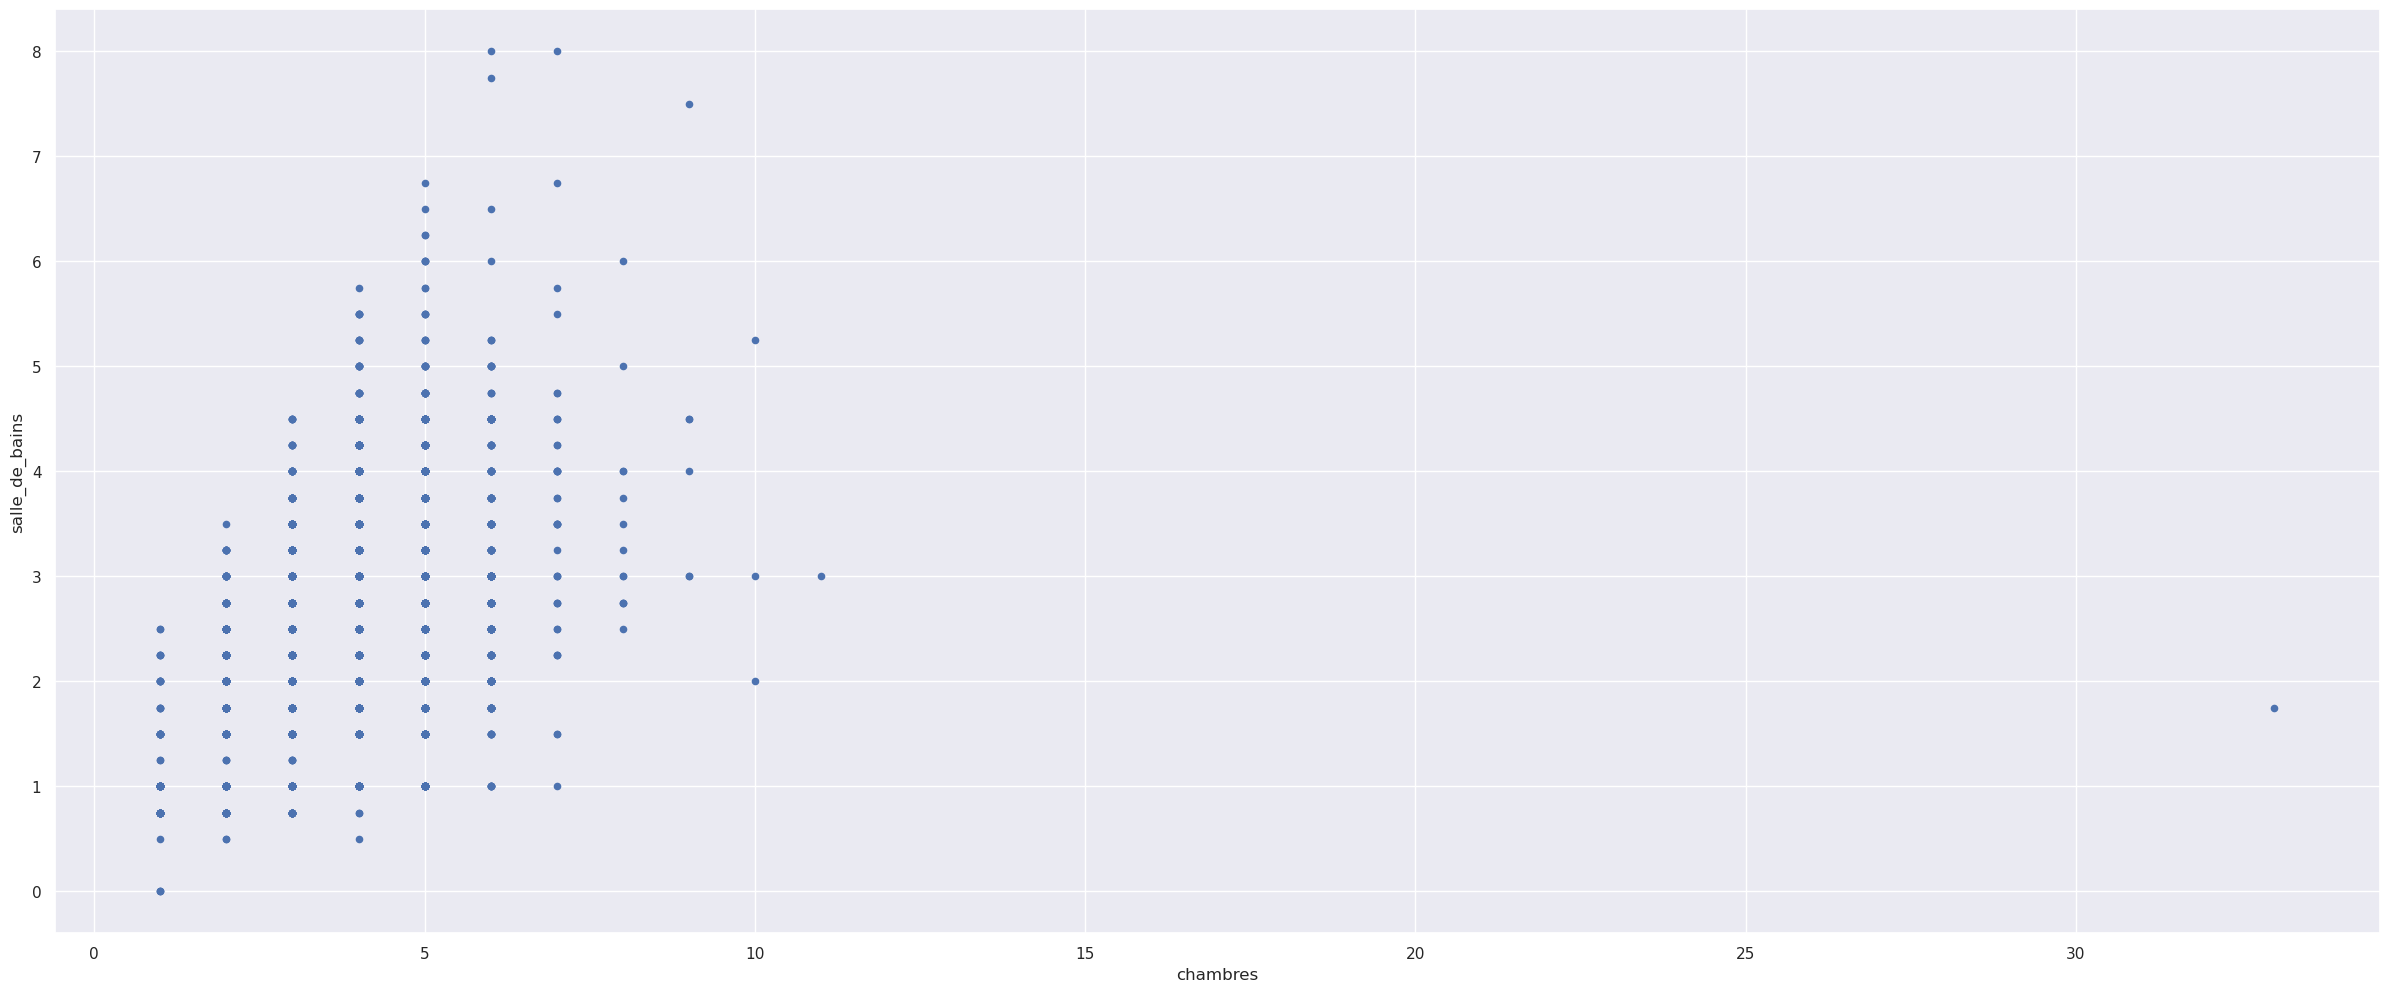

In [531]:
df.plot.scatter(x="chambres",y="salle_de_bains") 

<AxesSubplot:xlabel='surface', ylabel='prix'>

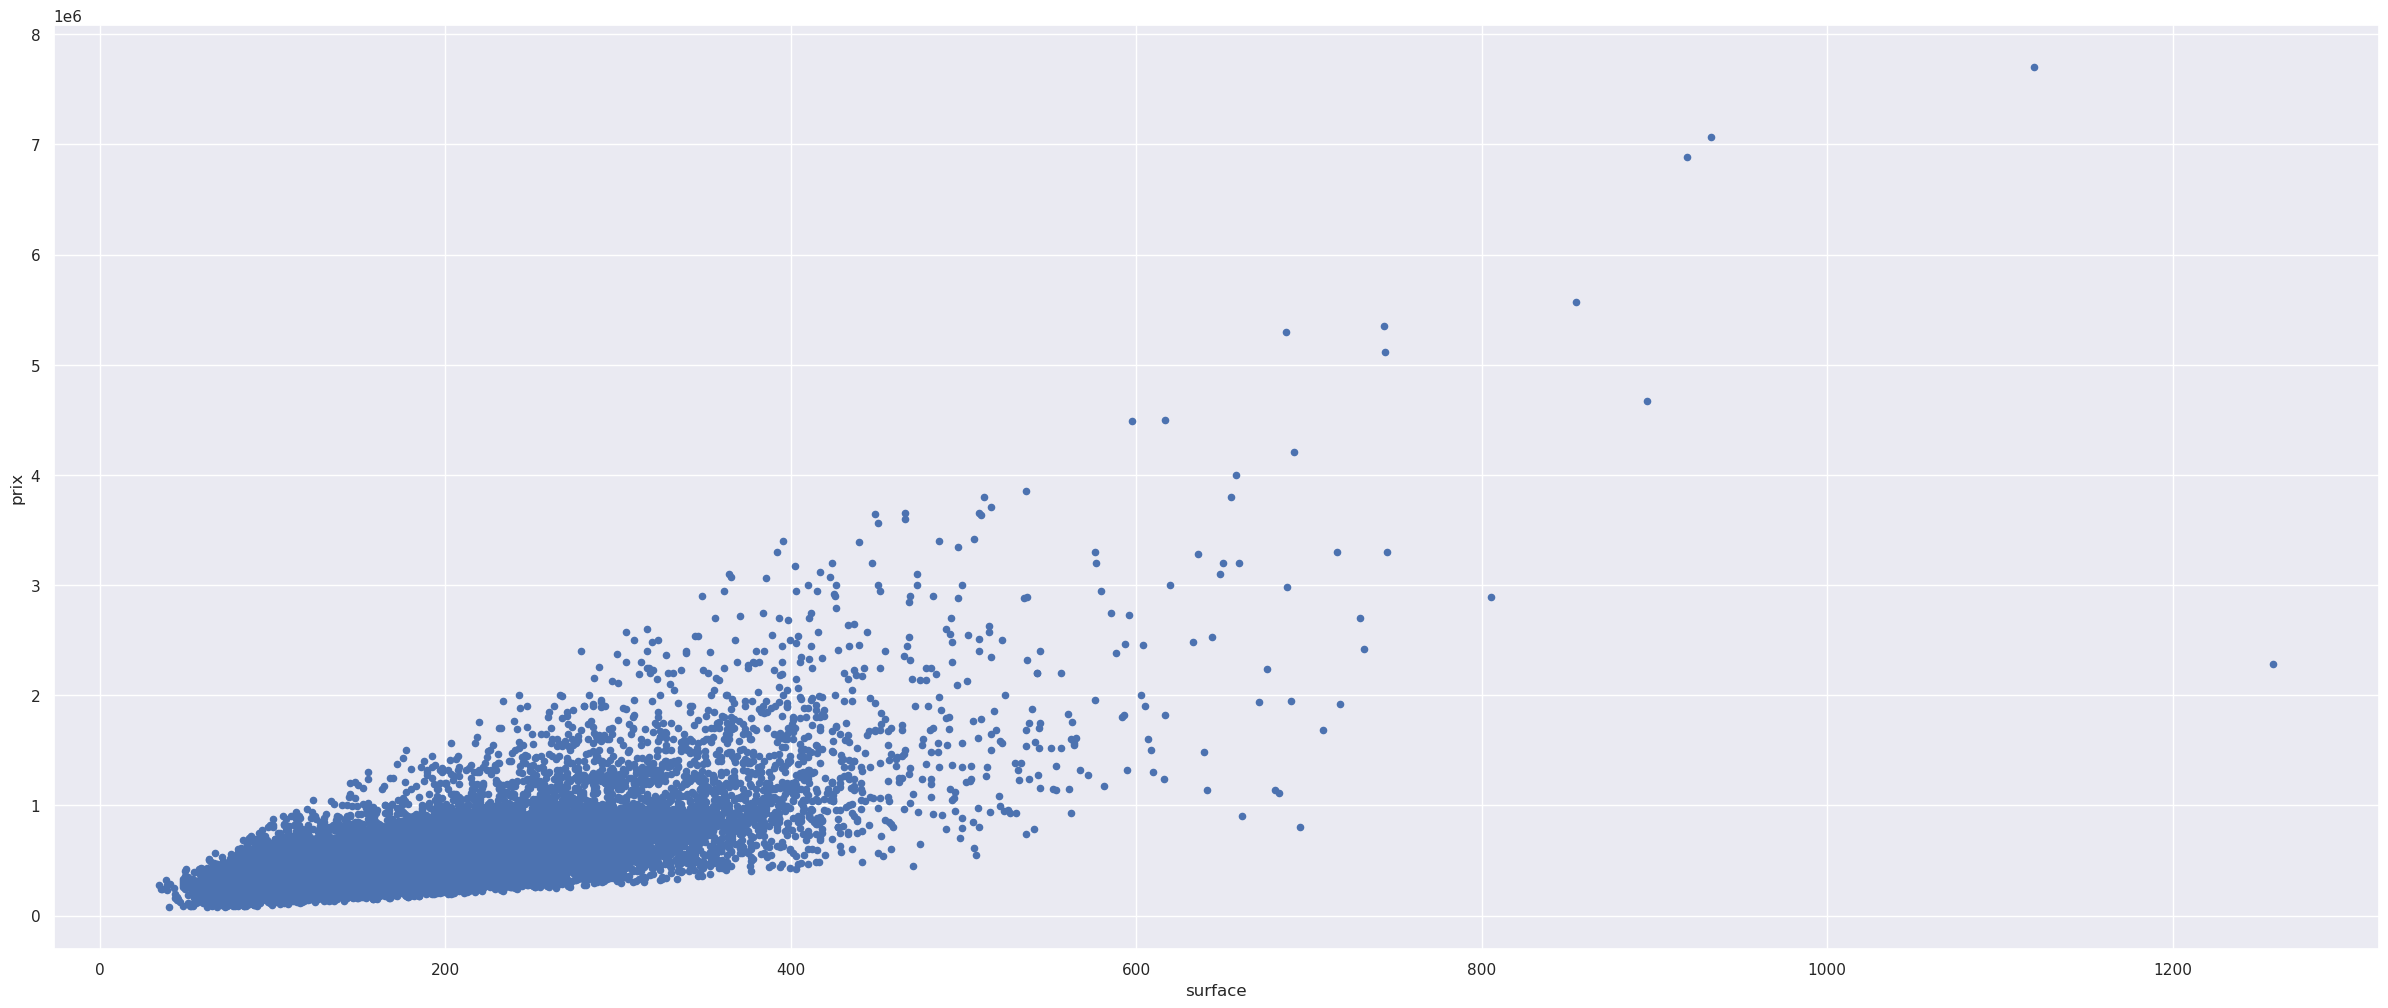

In [532]:
df.plot.scatter(x="surface",y="prix") 

<AxesSubplot:xlabel='vu', ylabel='prix'>

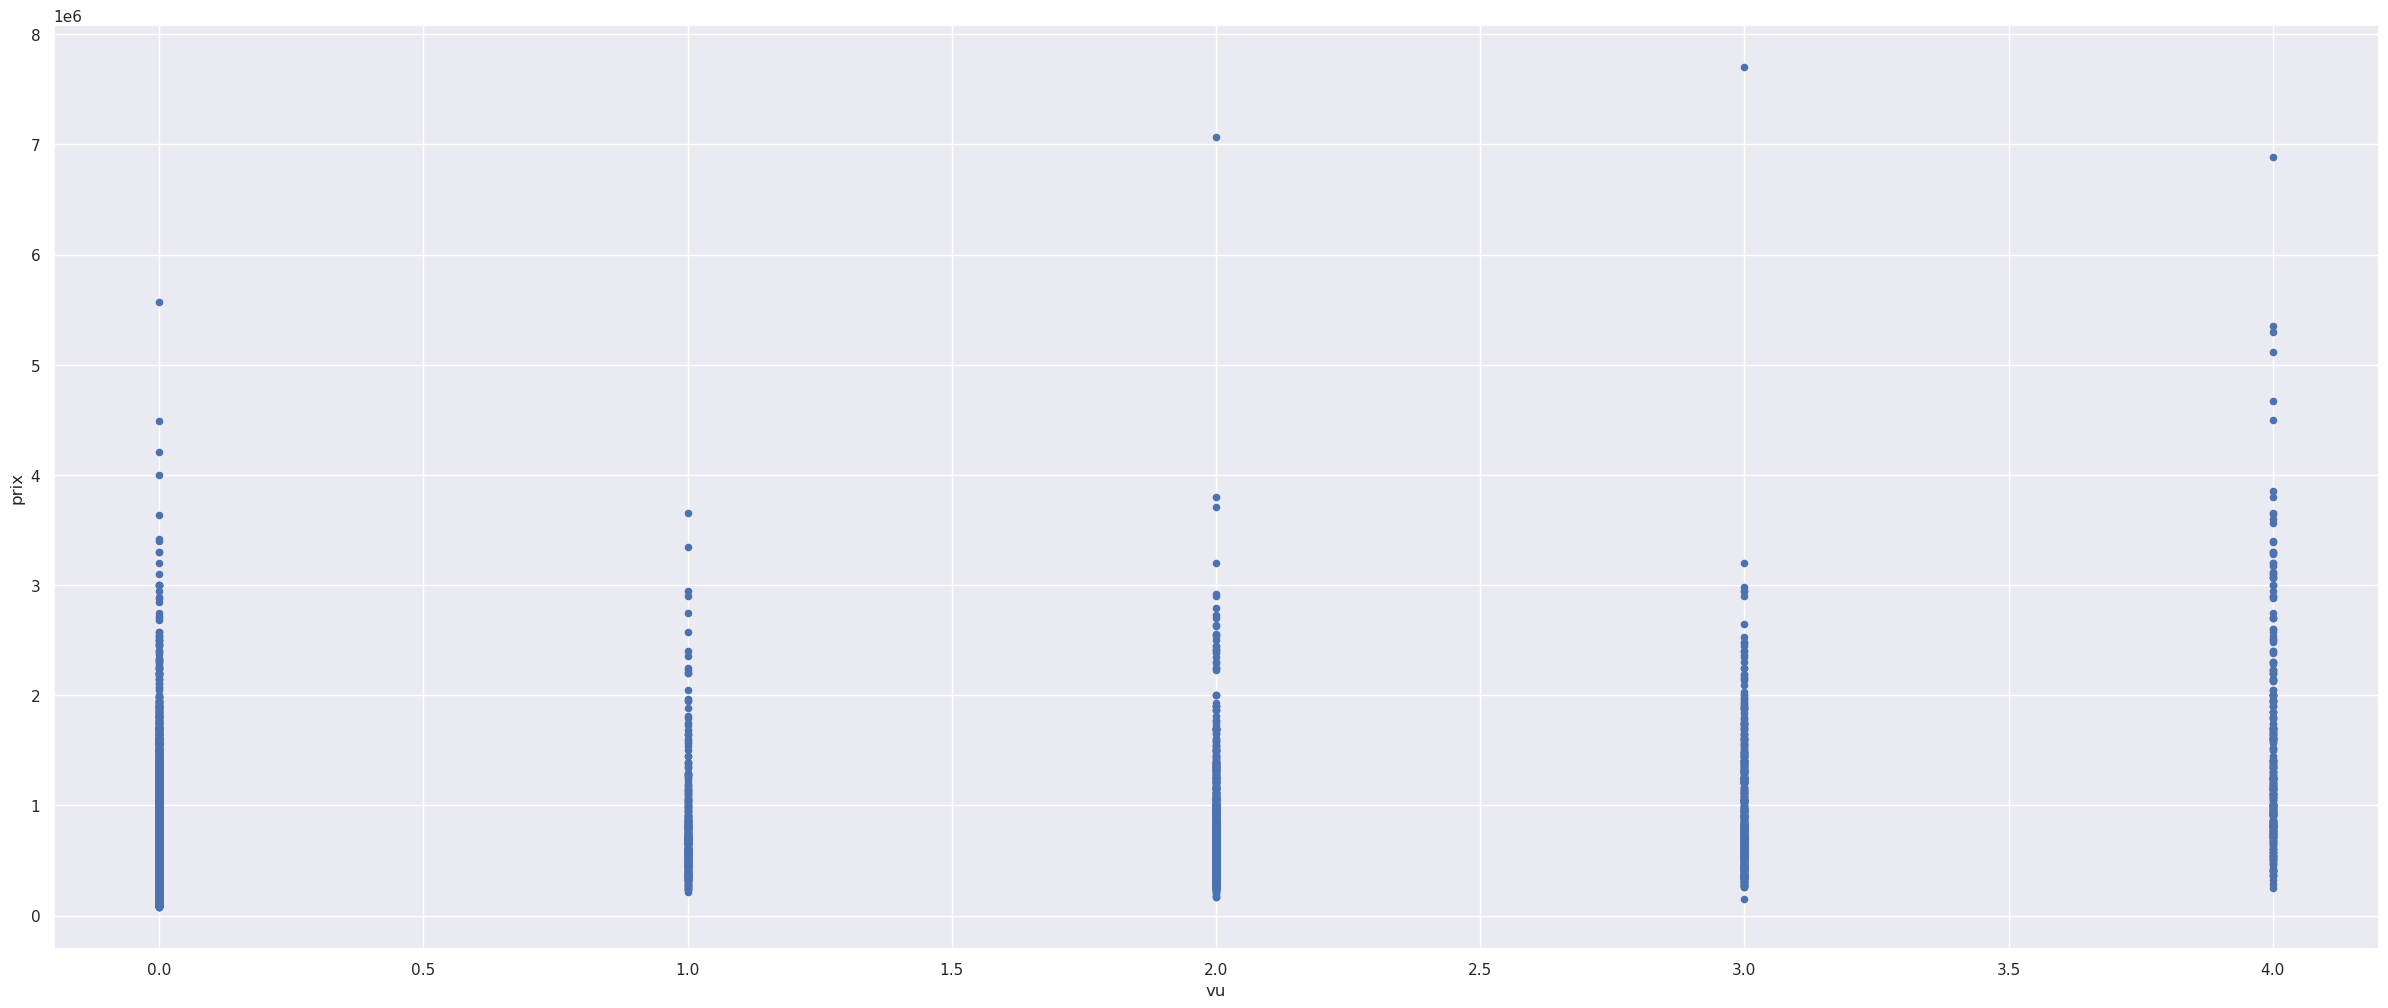

In [533]:
df.plot.scatter(x="vu",y="prix") 

In [534]:
# maisons par rapport à leurs surface
df['surface'].value_counts()

120.773900    138
130.064200    135
133.780320    133
93.832030     129
154.218980    129
             ... 
232.907821      1
918.810670      1
518.770352      1
182.182783      1
132.386775      1
Name: surface, Length: 1034, dtype: int64

In [535]:
df['vu'].value_counts()

0    19478
2      961
3      510
1      332
4      319
Name: vu, dtype: int64

In [536]:
df['prix'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: prix, Length: 4025, dtype: int64

In [537]:
df['chambres'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
33       1
Name: chambres, dtype: int64

In [538]:
df.shape

(21600, 97)

In [539]:
# on vire les colonnes ne servant à rien

df = df.drop('date', axis=1)
df = df.drop('id', axis=1)
df = df.drop('sur_cave', axis=1)
df = df.drop('lat',axis=1)
df = df.drop('lon',axis=1)
df = df.drop('code_postal',axis=1)
df = df.drop('sqft_habitable',axis=1)
df = df.drop('sqft_parcelle',axis=1)
df = df.drop('sur_habitable15',axis=1)
df = df.drop('sur_parcelle15',axis=1)
df = df.drop('surface_habit15', axis=1)
df = df.drop('surface_parc15', axis=1)
df = df.drop('sur_rdc', axis=1)

In [540]:
# corrélation avec tri par rapport au prix
df.corr().sort_values(by='prix', ascending=False)

,prix,chambres,salle_de_bains,etages,vue_mer,vu,condition,grade,annee_cons,annee_renov,surface,m2_parcelle,m2_cave,rdc,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
prix,1.000000,0.308890,0.525874,0.256876,0.266432,0.397326,0.036120,0.667764,0.054019,0.126429,0.701911,0.089827,0.323815,0.605398,-0.091967,-0.080345,-0.076809,0.271188,0.065115,0.133703,0.016988,0.033061,-0.021642,-0.012951,-0.017500,-0.029606,-0.063985,-0.106159,0.007613,0.029181,-0.024382,0.024251,-0.072783,-0.073911,-0.060032,0.102557,-0.008114,-0.078938,0.212612,0.204911,-0.100365,-0.027887,0.047286,0.051320,-0.072025,-0.044968,-0.074544,-0.018896,-0.003466,-0.010209,0.009181,0.057194,0.088676,0.037363,-0.071854,0.068062,0.020641,0.090979,-0.075416,0.011828,-0.046835,0.065851,0.169871,0.036173,0.026623,0.016173,-0.051587,0.078089,0.029931,-0.026591,-0.040597,-0.063758,0.003484,0.018816,-0.057213,-0.035765,-0.046054,-0.022563,-0.091718,0.040496,-0.069287,-0.054442,-0.074072,0.083659
surface,0.701911,0.578405,0.755827,0.354071,0.103856,0.284726,-0.059284,0.762707,0.318211,0.055344,1.000000,0.173342,0.435186,0.876482,-0.025039,-0.047510,-0.018877,0.110176,0.055607,0.135217,0.008999,0.006691,0.004268,0.017981,0.003132,0.009381,-0.028244,-0.015140,0.018788,0.065986,0.005346,0.027300,-0.014030,-0.018537,-0.028424,0.046866,-0.017779,0.012430,0.090273,0.128610,-0.017279,-0.001805,0.051021,0.080494,-0.036067,-0.009501,-0.004872,0.052437,0.065271,-0.015035,0.035926,0.088955,0.132564,0.081387,0.016173,0.005373,-0.079166,0.007943,-0.080958,-0.060876,-0.038115,-0.001966,0.051199,-0.044410,-0.030761,-0.068512,-0.065991,-0.007522,-0.037490,-0.050513,-0.075427,-0.077459,-0.042719,-0.023244,-0.058071,-0.026308,-0.046416,-0.001452,-0.074790,0.028952,-0.042332,-0.024045,-0.041783,0.010856
grade,0.667764,0.357145,0.666080,0.458790,0.082861,0.251661,-0.146277,1.000000,0.447706,0.014333,0.762707,0.114473,0.168350,0.755963,-0.040097,-0.079182,-0.011187,0.107103,0.062645,0.148881,0.021204,-0.000367,-0.014956,0.009505,-0.017499,-0.011790,-0.044513,-0.010781,-0.002335,0.063176,-0.004529,0.077231,-0.022706,-0.027001,-0.033369,0.050980,-0.020698,-0.008533,0.078063,0.127710,-0.032036,-0.003643,0.075183,0.072886,-0.050303,-0.035696,-0.011848,0.029880,0.021124,-0.023599,0.039720,0.129407,0.149600,0.092204,0.021283,0.037957,-0.035647,0.015958,-0.084653,-0.022128,-0.050914,0.021893,0.075084,-0.041928,-0.009311,-0.051827,-0.089951,0.028763,0.008682,-0.056971,-0.068873,-0.069482,-0.024060,-0.021927,-0.082638,-0.031113,-0.060241,-0.024508,-0.109830,0.029702,-0.079349,-0.042086,-0.054069,0.036923
rdc,0.605398,0.479593,0.686741,0.524064,0.072116,0.167644,-0.158733,0.755963,0.424076,0.023288,0.876482,0.184043,-0.052022,1.000000,-0.010187,-0.030975,-0.017290,0.093089,0.039761,0.095007,0.009521,-0.010488,0.017458,0.019154,0.017908,0.028200,-0.008234,-0.015357,0.030461,0.054859,-0.001022,0.056992,0.002067,-0.011469,-0.032638,0.047014,-0.024710,0.053983,0.087427,0.095298,0.011264,0.018329,0.062649,0.124889,-0.027986,-0.000231,0.003015,0.086527,0.097856,-0.009095,0.039910,0.112992,0.163764,0.102705,0.042918,-0.003025,-0.078421,-0.011877,-0.091000,-0.063564,-0.054961,-0.012999,0.029473,-0.076761,-0.055493,-0.089111,-0.085671,-0.022224,-0.041681,-0.061501,-0.084114,-0.078777,-0.058517,-0.047849,-0.058080,-0.018763,-0.054441,-0.010933,-0.075203,0.006374,-0.061903,-0.028491,-0.043219,-0.028973
salle_de_bains,0.525874,0.514981,1.000000,0.502638,0.063744,0.188403,-0.126155,0.666080,0.507105,0.050598,0.755827,0.088184,0.283534,0.686741,-0.017584,-0.034637,-0.010161,0.065370,0.035512,0.087900,0.006135,-0.004073,-0.007804,0.020182,-0.006632,0.0

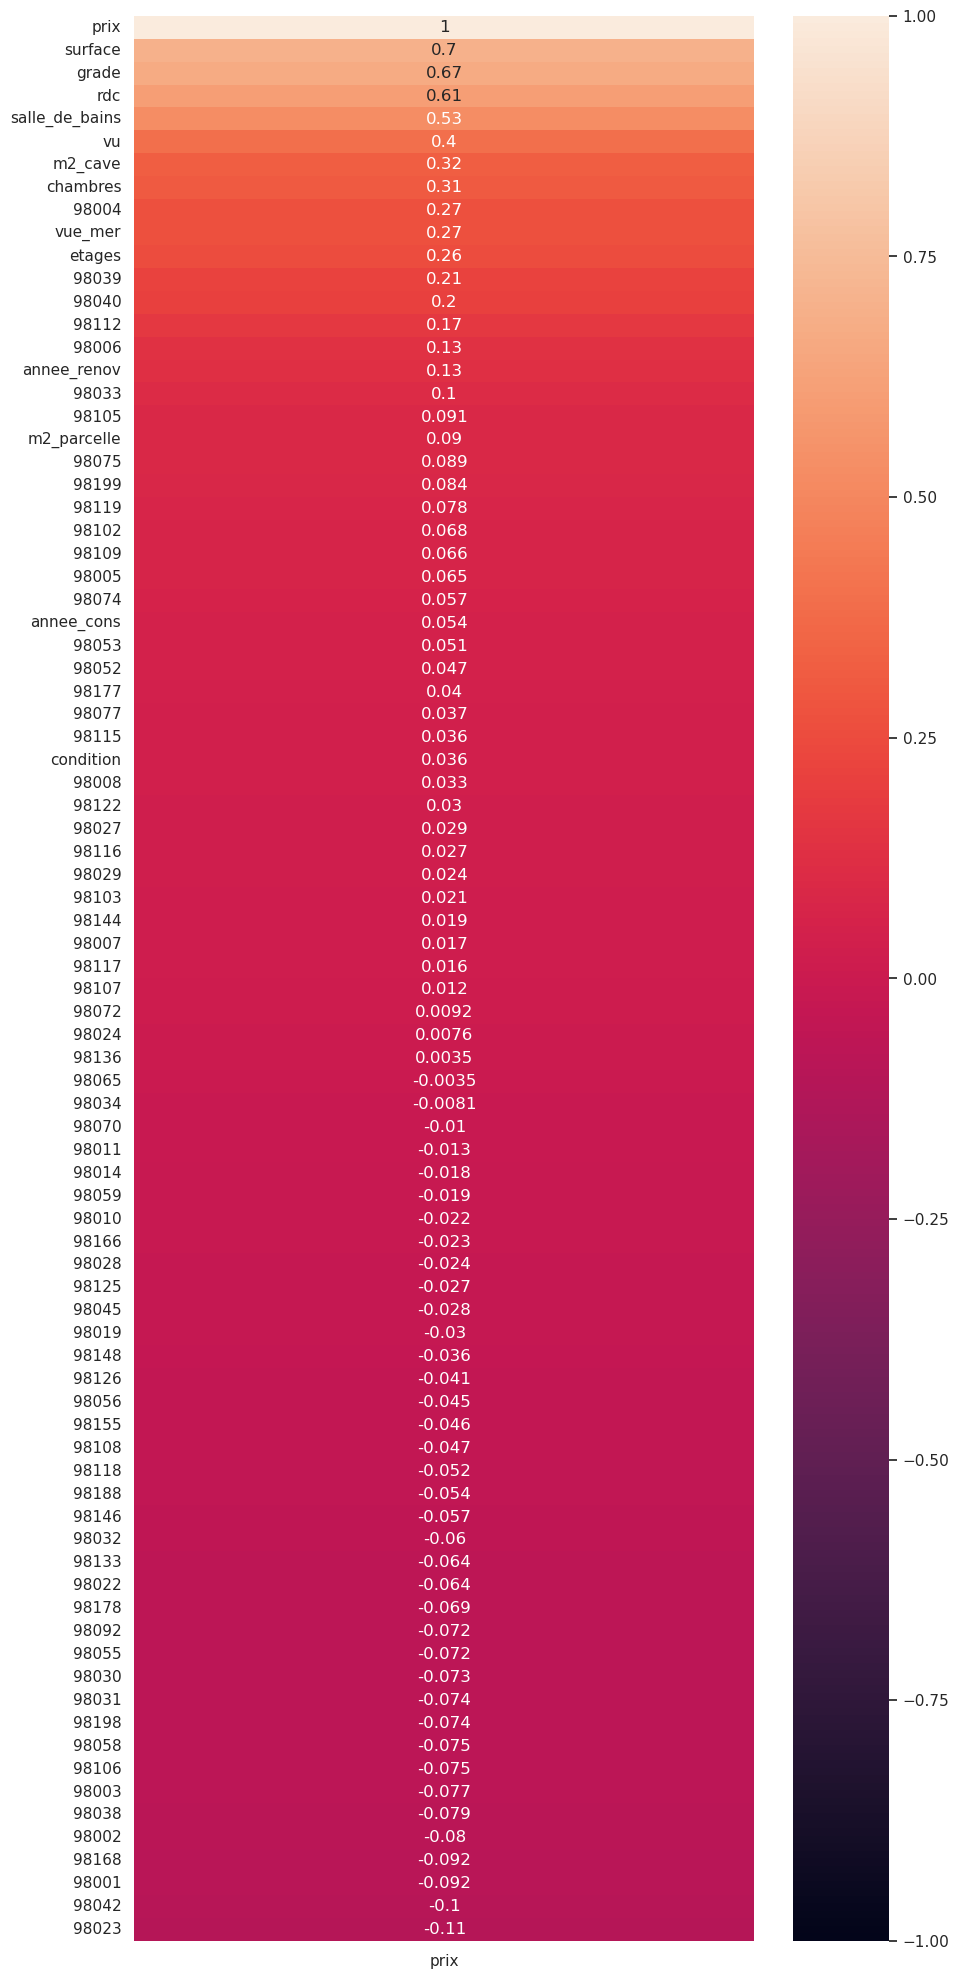

In [541]:
# tableau de corrélation 

plt.figure(figsize=(10, 25))

heatmap = sns.heatmap(df.corr()[['prix']].sort_values(by='prix', ascending=False), vmin=-1, vmax=1, annot=True)

In [542]:
# on enlève les maisons avec moins d'une chambre
df.drop(df[df['chambres'] < 1].index, inplace= True)

In [543]:
# on enlève les maisons avec moins de 0.75 sdv
df.drop(df[df['salle_de_bains'] < 0.75].index, inplace= True)

In [544]:
# on enlève les maisons avec plus de 15 chambres
df.drop(df[df['chambres'] > 15].index, inplace= True)

In [545]:
# verification du nb de maisons par rapport aux chambres
df['chambres'].value_counts()

3     9824
4     6881
2     2758
5     1601
6      272
1      195
7       38
8       13
9        6
10       3
11       1
Name: chambres, dtype: int64

In [546]:
# filtre les maisons avec moins d'une sdb
df.loc[df['salle_de_bains'] <1]

,prix,chambres,salle_de_bains,etages,vue_mer,vu,condition,grade,annee_cons,annee_renov,surface,m2_parcelle,m2_cave,rdc,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
208,180250.0,2,0.75,1.0,0,0,3,6,1941,0,83.612700,891.868800,0.00000,83.612700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
264,369900.0,1,0.75,1.0,1,4,5,5,1936,0,70.606280,936.369337,0.00000,70.606280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,299000.0,1,0.75,1.0,0,0,3,4,1967,0,52.025680,1125.984360,0.00000,52.025680,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
465,80000.0,1,0.75,1.0,0,0,2,4,1912,0,39.948290,469.160150,0.00000,39.948290,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
569,405000.0,2,0.75,1.0,0,0,4,6,1937,0,107.767480,1396.239187,26.94187,80.825610,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,245000.0,1,0.75,1.0,0,0,3,5,1963,0,35.303140,1393.545000,0.00000,35.303140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1168,290000.0,2,0.75,1.0,1,3,4,5,1943,0,40.877320,772.302639,0.00000,40.877320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1389,275000.0,1,0.75,1.0,0,0,5,7,1962,0,108.696510,1314.484547,26.94187,81.754640,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1484,530000.0,3,0.75,1.0,1,2,5,6,1950,0,85.470760,1896.336036,0.00000,85.470760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1971,250000.0,1,0.75,1.0,0,0,3,6,1944,0,87.328820,8093.709360,0.00000,87.328820,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [547]:
# filtre les maisons avec plus de 10 chambres
df.loc[df['chambres'] >10]

,prix,chambres,salle_de_bains,etages,vue_mer,vu,condition,grade,annee_cons,annee_renov,surface,m2_parcelle,m2_cave,rdc,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
8757,520000.0,11,3.0,2.0,0,0,3,7,1918,1999,278.709,460.79888,55.7418,222.9672,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [548]:
df.shape

(21592, 84)

In [549]:
df.head()

,prix,chambres,salle_de_bains,etages,vue_mer,vu,condition,grade,annee_cons,annee_renov,surface,m2_parcelle,m2_cave,rdc,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1.0,0,0,3,7,1955,0,109.62554,524.901950,0.00000,109.62554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,238.76071,672.803526,37.16120,201.59951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,1.0,0,0,3,6,1933,0,71.53531,929.030000,0.00000,71.53531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1.0,0,0,5,7,1965,0,182.08988,464.515000,84.54173,97.54815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1.0,0,0,3,8,1987,0,156.07704,750.656240,0.00000,156.07704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [550]:
# creation d'un nouveau fichier de type CSV pour la partie modelisation
df.to_csv('df.csv',index=False)

In [551]:
df.columns

Index([          'prix',       'chambres', 'salle_de_bains',         'etages',
              'vue_mer',             'vu',      'condition',          'grade',
           'annee_cons',    'annee_renov',        'surface',    'm2_parcelle',
              'm2_cave',            'rdc',            98001,            98002,
                  98003,            98004,            98005,            98006,
                  98007,            98008,            98010,            98011,
                  98014,            98019,            98022,            98023,
                  98024,            98027,            98028,            98029,
                  98030,            98031,            98032,            98033,
                  98034,            98038,            98039,            98040,
                  98042,            98045,            98052,            98053,
                  98055,            98056,            98058,            98059,
                  98065,            98070,          

In [552]:
df.describe().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                prix      chambres  salle_de_bains        etages       vue_mer  \
count  2.159200e+04  21592.000000    21592.000000  21592.000000  21592.000000   
mean   5.402544e+05      3.372036        2.116143      1.494165      0.007549   
std    3.671510e+05      0.903947        0.768755      0.539692      0.086559   
min    7.800000e+04      1.000000        0.750000      1.000000      0.000000   
25%    3.220000e+05      3.000000        1.750000      1.000000      0.000000   
50%    4.500000e+05      3.000000        2.250000      1.500000      0.000000   
75%    6.450000e+05      4.000000        2.500000      2.000000      0.000000   
max    7.700000e+06     11.000000        8.000000      3.500000      1.000000   

                 vu     condition         grade    annee_cons   annee_renov  \
count  21592.000000  21592.000000  21592.000000  21592.000000  21592.000000   
mean       0.234346      3.409781      7.658207  